# test_fov.ipynb

In [1]:
nb = "test_fov.ipynb"
print(nb,'=nb')
version = '1e'
print(version,'=version')

import os
cwd=os.getcwd()
print(cwd,'=cwd')

import datetime
print(datetime.datetime.now())

test_fov.ipynb =nb
1e =version
/Volumes/System Disk/Users/steve/work/kepler/so/raDec2Pix/Kepler-RaDex2Pix =cwd
2020-04-26 02:05:08.550325


One-line usage example:

In [2]:
# usage example
import raDec2Pix  # https://github.com/stevepur/Kepler-RaDex2Pix
rdp = raDec2Pix.raDec2PixClass("raDec2PixDir")
m, o, r, c = rdp.ra_dec_2_pix(299.89509, 40.6334, 55183.0)
print("module " + str(m) + ", output " + str(o) + ", row " + str(r) + ", column " + str(c))

module 22, output 3, row 162.8879188939173, column 99.7341745175919


Show the Kepler FOV using the ra_dec_2_pix method with 3 scaler parameters (**SLOW**) :

##### 3-scaler test (slow: about 66 sec) #####
2400  data points
processed:


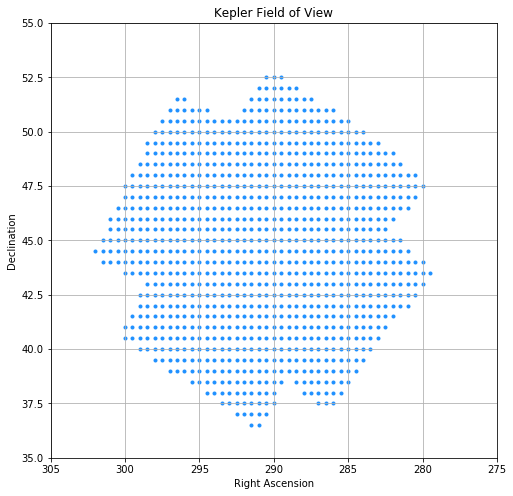

ok
1min 43s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [3]:
%%timeit -n 1 -r 1

print('##### 3-scaler test (slow: about 66 sec) #####')

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import raDec2Pix  # https://github.com/stevepur/Kepler-RaDex2Pix

rdp = raDec2Pix.raDec2PixClass("raDec2PixDir")

# center of the Kepler FOV: (290.67 deg, 44.5 deg)
#
dx = dy = 0.5 # degrees  <--- CUSTOMIZE
#
ra_min = 275; ra_max = 305; x = np.arange(ra_min,ra_max,dx)    # RA
dec_min = 35; dec_max = 55; y = np.arange(dec_min,dec_max,dy)  # DEC
xm, ym = np.meshgrid (x, y)
xv = xm.flatten()
yv = ym.flatten()
sz = xv.size
print(sz,' data points')
print('processed:')

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xlim(ra_max,ra_min)
ax.set_ylim(dec_min,dec_max)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_title('Kepler Field of View')
ax.grid(True)

for j in range(sz):
    ra = xv[j]
    dec = yv[j]
    m, o, r, c = rdp.ra_dec_2_pix(ra, dec, 55183.0)  # 3 scaler parameters
    if (m>0): ax.scatter(ra,dec,s=9,c='dodgerblue')
    if ((j%100)==0): print('%6d\r' % (j), end='')

plt.show();

print('ok')


Show the Kepler FOV using the ra_dec_2_pix method with 2 vector parameters (**FAST**) :

##### 2-vector test (fast: about 424 ms) #####
2400  data points
965  plotted data points


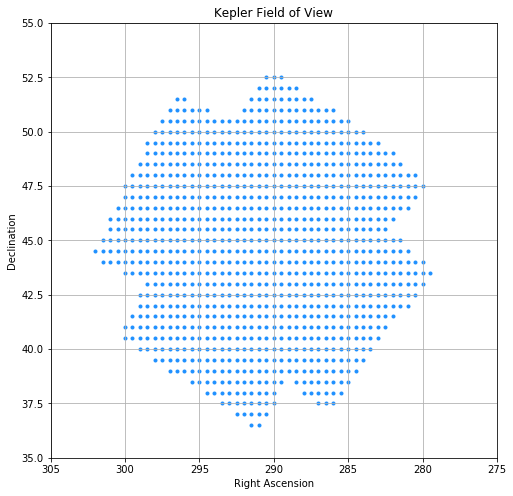

ok
676 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [4]:
%%timeit -n 1 -r 1

print('##### 2-vector test (fast: about 424 ms) #####')

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import raDec2Pix  # https://github.com/stevepur/Kepler-RaDex2Pix

rdp = raDec2Pix.raDec2PixClass("raDec2PixDir")

# center of the Kepler FOV: (290.67 deg, 44.5 deg)
#
dx = dy = 0.5 # degrees  <--- CUSTOMIZE
#
ra_min = 275; ra_max = 305; x = np.arange(ra_min,ra_max,dx)    # RA
dec_min = 35; dec_max = 55; y = np.arange(dec_min,dec_max,dy)  # DEC
xm, ym = np.meshgrid (x, y)
xv = xm.flatten()
yv = ym.flatten()
sz = xv.size
print(sz,' data points')

xm, ym = np.meshgrid (x, y)
xv = xm.flatten(); yv = ym.flatten()
del xm; del ym
rdp = raDec2Pix.raDec2PixClass("raDec2PixDir")
# verbose:
#mv, ov, rv, cv = rdp.ra_dec_2_pix(xv, yv, 55183.0)  # 2 vector parameters
#del ov; del rv; del cv
# terse:
mv, _, _, _ = rdp.ra_dec_2_pix(xv, yv, 55183.0)  # 2 vector parameters
idx = mv > 0
xx = xv[idx]
yy = yv[idx]
del idx; del xv; del yv
print(xx.size,' plotted data points')

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(xx,yy,s=9,c='dodgerblue')
ax.set_xlim(ra_max,ra_min)
ax.set_ylim(dec_min,dec_max)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_title('Kepler Field of View')
ax.grid(True)

plt.show();

print('ok')


Show the Kepler FOV using the ra_dec_2_pix method with 1 vector parameter:

##### 1-vector test (1 of 2) (about 1.51 s) #####
60 =x.size
40 =y.size
2400  data points
0  plotted at 35.0 =dec
0  plotted at 35.5 =dec
0  plotted at 36.0 =dec
2  plotted at 36.5 =dec
5  plotted at 37.0 =dec
11  plotted at 37.5 =dec
16  plotted at 38.0 =dec
21  plotted at 38.5 =dec
26  plotted at 39.0 =dec
29  plotted at 39.5 =dec
32  plotted at 40.0 =dec
35  plotted at 40.5 =dec
36  plotted at 41.0 =dec
36  plotted at 41.5 =dec
37  plotted at 42.0 =dec
38  plotted at 42.5 =dec
38  plotted at 43.0 =dec
42  plotted at 43.5 =dec
44  plotted at 44.0 =dec
43  plotted at 44.5 =dec
41  plotted at 45.0 =dec
38  plotted at 45.5 =dec
39  plotted at 46.0 =dec
40  plotted at 46.5 =dec
40  plotted at 47.0 =dec
41  plotted at 47.5 =dec
39  plotted at 48.0 =dec
36  plotted at 48.5 =dec
34  plotted at 49.0 =dec
32  plotted at 49.5 =dec
29  plotted at 50.0 =dec
26  plotted at 50.5 =dec
19  plotted at 51.0 =dec
11  plotted at 51.5 =dec
6  plotted at 52.0 =dec
3  plotted at 52.5 =dec
0  plotted at 53.

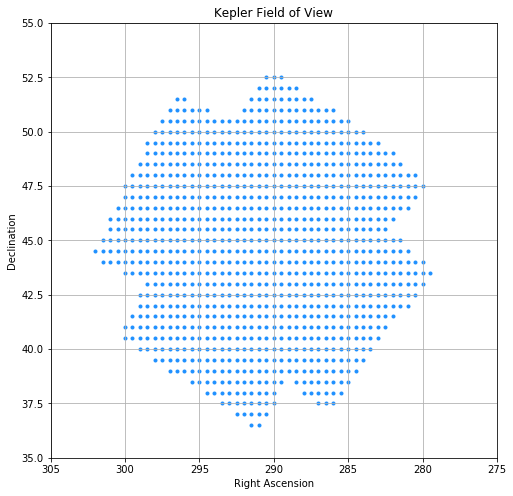

ok
2.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [5]:
%%timeit -n 1 -r 1

print('##### 1-vector test (1 of 2) (about 1.51 s) #####')

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import raDec2Pix  # https://github.com/stevepur/Kepler-RaDex2Pix

rdp = raDec2Pix.raDec2PixClass("raDec2PixDir")

# center of the Kepler FOV: (290.67 deg, 44.5 deg)
#
dx = dy = 0.5 # degrees  <--- CUSTOMIZE
#
ra_min = 275; ra_max = 305; x = np.arange(ra_min,ra_max,dx)    # RA
dec_min = 35; dec_max = 55; y = np.arange(dec_min,dec_max,dy)  # DEC
print(x.size,'=x.size')
print(y.size,'=y.size')

xm, ym = np.meshgrid (x, y)
xv = xm.flatten()
yv = ym.flatten()
print(xv.size,' data points')

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xlim(ra_max,ra_min)
ax.set_ylim(dec_min,dec_max)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_title('Kepler Field of View')
ax.grid(True)

n = 0
xv = x
sz = xv.size
yv = np.zeros(sz)
for dec in y:
    mv, _, _, _ = rdp.ra_dec_2_pix(xv, dec, 55183.0)  # 1 vector parameter
    yv.fill(dec)
    idx = mv > 0
    xx = xv[idx]
    yy = yv[idx]
    del mv; del idx
    print(xx.size,' plotted at', dec, '=dec')
    nn = xx.size
    if (nn > 0):
        ax.scatter(xx,yy,s=9,c='dodgerblue')
        n += nn
print(n,'plotted data points')
plt.show();

print('ok')

Show the Kepler FOV using the ra_dec_2_pix method with 1 vector parameter:

##### 1-vector test (2 of 2) (about 2.26 s) #####
60 =x.size
40 =y.size
2400  data points
0  plotted at 275.0 =ra
0  plotted at 275.5 =ra
0  plotted at 276.0 =ra
0  plotted at 276.5 =ra
0  plotted at 277.0 =ra
0  plotted at 277.5 =ra
0  plotted at 278.0 =ra
0  plotted at 278.5 =ra
0  plotted at 279.0 =ra
1  plotted at 279.5 =ra
4  plotted at 280.0 =ra
7  plotted at 280.5 =ra
10  plotted at 281.0 =ra
12  plotted at 281.5 =ra
15  plotted at 282.0 =ra
17  plotted at 282.5 =ra
19  plotted at 283.0 =ra
20  plotted at 283.5 =ra
22  plotted at 284.0 =ra
23  plotted at 284.5 =ra
25  plotted at 285.0 =ra
26  plotted at 285.5 =ra
28  plotted at 286.0 =ra
28  plotted at 286.5 =ra
28  plotted at 287.0 =ra
28  plotted at 287.5 =ra
28  plotted at 288.0 =ra
28  plotted at 288.5 =ra
27  plotted at 289.0 =ra
29  plotted at 289.5 =ra
31  plotted at 290.0 =ra
32  plotted at 290.5 =ra
32  plotted at 291.0 =ra
31  plotted at 291.5 =ra
29  plotted at 292.0 =ra
28  plotted at 292.5 =ra
27  plotted at 293.0 =

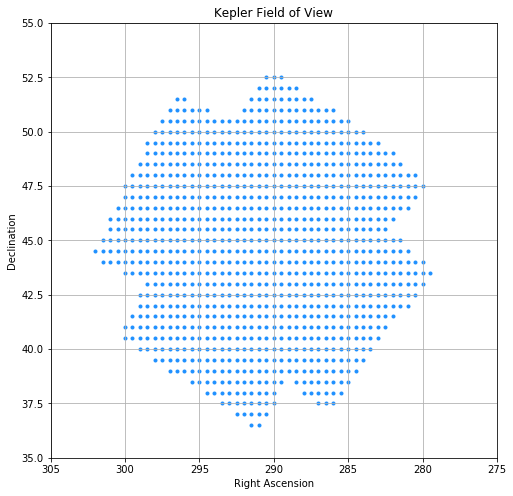

ok
3.24 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [6]:
%%timeit -n 1 -r 1

print('##### 1-vector test (2 of 2) (about 2.26 s) #####')

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import raDec2Pix  # https://github.com/stevepur/Kepler-RaDex2Pix

rdp = raDec2Pix.raDec2PixClass("raDec2PixDir")

# center of the Kepler FOV: (290.67 deg, 44.5 deg)
#
dx = dy = 0.5 # degrees  <--- CUSTOMIZE
#
ra_min = 275; ra_max = 305; x = np.arange(ra_min,ra_max,dx)    # RA
dec_min = 35; dec_max = 55; y = np.arange(dec_min,dec_max,dy)  # DEC
print(x.size,'=x.size')
print(y.size,'=y.size')

xm, ym = np.meshgrid (x, y)
xv = xm.flatten()
yv = ym.flatten()
print(xv.size,' data points')

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xlim(ra_max,ra_min)
ax.set_ylim(dec_min,dec_max)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_title('Kepler Field of View')
ax.grid(True)

n = 0
yv = y
sz = yv.size
xv = np.zeros(sz)
for ra in x:
    mv, _, _, _ = rdp.ra_dec_2_pix(ra, yv, 55183.0)  # 1 vector parameter
    xv.fill(ra)
    idx = mv > 0
    xx = xv[idx]
    yy = yv[idx]
    del mv; del idx
    print(yy.size,' plotted at', ra, '=ra')
    nn = yy.size
    if (nn > 0):
        ax.scatter(xx,yy,s=9,c='dodgerblue')
        n += nn
print(n,'plotted data points')
plt.show();

print('ok')

In [7]:
#EOF